In [2]:
import numpy as np
import pandas as pd
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [10]:
columns=["user_id","item_id","Rating","Timestamp"]
df = pd.read_csv("../Downloads/ml-100k/u.data",sep='\t',names=columns)

In [11]:
df.head()

,user_id,item_id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [19]:
movie = pd.read_csv("../Downloads/ml-100k/u.item",sep='\|',header=None)[[0,1]]
movie.columns = ['item_id','movie_title']

In [20]:
movie.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [22]:
df = pd.merge(df,movie, on="item_id")

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df.groupby('movie_title').mean()['Rating'].sort_values(ascending=False)

movie_title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de d�cembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: Rating, Length: 1664, dtype: float64

In [31]:
df.groupby('movie_title').count()['Rating'].sort_values(ascending=False)

movie_title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
� k�ldum klaka (Cold Fever) (1994)              1
Name: Rating, Length: 1664, dtype: int64

In [29]:
Ratings = pd.DataFrame(df.groupby('movie_title').mean()['Rating'])
Ratings['No of ratings'] = pd.DataFrame(df.groupby('movie_title').count()['Rating'])

In [46]:
 Ratings.sort_values(by='No of ratings' ,ascending=False)

,Rating,No of ratings
movie_title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


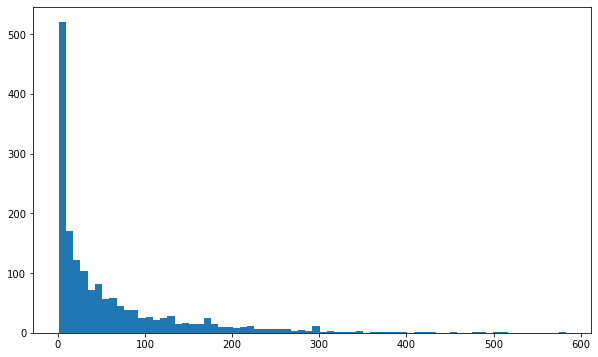

In [36]:
plt.figure(figsize=(10,6))
plt.hist(Ratings['No of ratings'],bins=70)
plt.show()

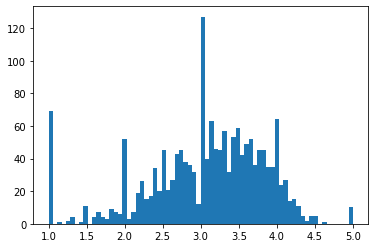

In [37]:
plt.hist(Ratings['Rating'],bins=70)
plt.show()

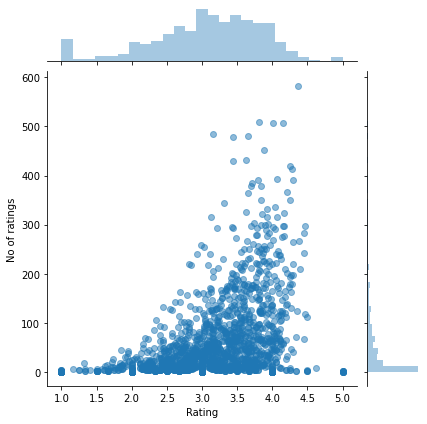

In [40]:
sns.jointplot(x='Rating',y='No of ratings', data=Ratings, alpha=0.5)

In [47]:
moviemat = df.pivot_table(index='user_id',columns='movie_title',values='Rating',margins=True)

In [48]:
moviemat.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994),All
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN,3.610294
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.709677
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.796296
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,2.874286


In [63]:
starwars_rating = moviemat['Star Wars (1977)']

In [61]:
similar_to_starwars = moviemat.corrwith(starwars_rating)
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [62]:
corr_starwars.head()

,Correlation
movie_title,
'Til There Was You (1997),0.863510
1-900 (1994),-0.648059
101 Dalmatians (1996),0.211158
12 Angry Men (1957),0.184256
187 (1997),0.026258


In [64]:
corr_starwars.sort_values('Correlation',ascending=False)

,Correlation
movie_title,
"Sexual Life of the Belgians, The (1994)",1.0
"Machine, The (1994)",1.0
"Letter From Death Row, A (1998)",1.0
"Lay of the Land, The (1997)",1.0
"Stranger, The (1994)",1.0
...,...
"Ballad of Narayama, The (Narayama Bushiko) (1958)",-1.0
Relative Fear (1994),-1.0
Rough Magic (1995),-1.0


In [66]:
corr_starwars = corr_starwars.join(Ratings['No of ratings'])

In [70]:
corr_starwars[corr_starwars['No of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,No of ratings
movie_title,,
Star Wars (1977),1.000000,583.0
"Empire Strikes Back, The (1980)",0.747975,367.0
Return of the Jedi (1983),0.672553,507.0
Raiders of the Lost Ark (1981),0.536117,420.0
Austin Powers: International Man of Mystery (1997),0.377401,130.0
...,...,...
"Edge, The (1997)",-0.127182,113.0
As Good As It Gets (1997),-0.130353,112.0
Crash (1996),-0.148738,128.0


In [71]:
def Predict(movie):
    movie_rating = moviemat['movie']
    similar_to_movie = moviemat.corrwith(movie_rating)
    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie = corr_movie.join(Ratings['No of ratings'])
    prediction=corr_movie[corr_movie['No of ratings']>100].sort_values('Correlation',ascending=False)
    return prediction